In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/bonnyma/Downloads/experiment_dataset.csv')
df

,Unnamed: 0,Age,Location,Device,Variant,Time Spent,CTR
0,0,62,Location2,Device2,Control,13.928669,0.084776
1,1,18,Location1,Device1,Variant B,11.310518,0.096859
2,2,21,Location2,Device1,Variant B,24.842100,0.097630
3,3,21,Location1,Device3,Variant B,20.061300,0.109783
4,4,57,Location1,Device2,Variant B,34.495503,0.068579
...,...,...,...,...,...,...,...
995,995,39,Location2,Device2,Variant B,17.252030,0.092211
996,996,38,Location3,Device2,Control,30.075898,0.078151
997,997,60,Location2,Device3,Control,31.929223,0.125213
998,998,35,Location2,Device2,Variant B,14.680299,0.095423


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Device      1000 non-null   object 
 4   Variant     1000 non-null   object 
 5   Time Spent  1000 non-null   float64
 6   CTR         1000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 54.8+ KB


In [4]:
df.describe()

,Unnamed: 0,Age,Time Spent,CTR
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,40.715000,22.713345,0.109145
std,288.819436,13.655557,5.479292,0.022366
min,0.000000,18.000000,7.114806,0.012975
25%,249.750000,28.000000,19.216608,0.094286
50%,499.500000,41.000000,22.506707,0.108944
75%,749.250000,53.000000,26.255950,0.124238
max,999.000000,64.000000,39.395770,0.172728


<Axes: xlabel='CTR', ylabel='Count'>

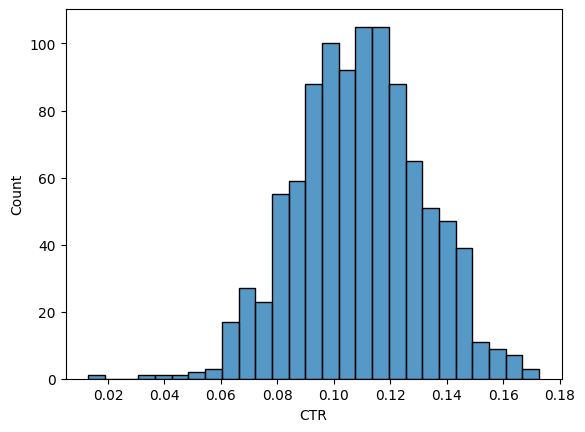

In [5]:
sns.histplot(df['CTR'])

<Axes: xlabel='Time Spent', ylabel='Count'>

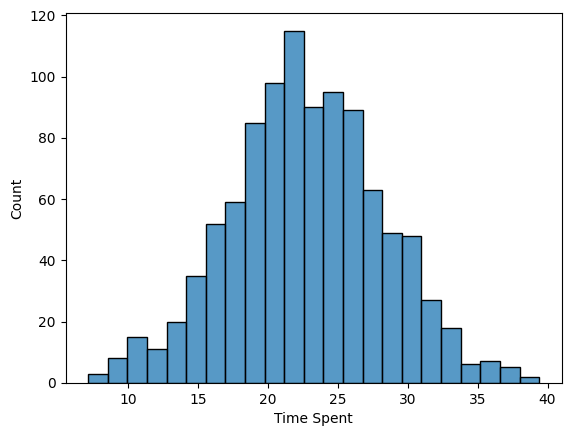

In [6]:
sns.histplot(df['Time Spent'])

**1. Analyze the results to determine which feature (if any) results in CTR or Time Spent lift.**

In [7]:
df.groupby('Variant')[['Time Spent']].mean()

,Time Spent
Variant,
Control,20.070781
Variant A,24.805547
Variant B,23.343783


In [8]:
df.groupby('Variant')[['CTR']].mean()

,CTR
Variant,
Control,0.098554
Variant A,0.120269
Variant B,0.108933


**2.Conduct statistical testing.**

In [18]:
loc_1 = df[df['Location'] == 'Location1']['Time Spent']
loc_2 = df[df['Location'] == 'Location2']['Time Spent']
loc_3 = df[df['Location'] == 'Location3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.053578839670573676, pvalue=0.9478339402848069)


In [19]:
loc_1 = df[df['Location'] == 'Location1']['CTR']
loc_2 = df[df['Location'] == 'Location2']['CTR']
loc_3 = df[df['Location'] == 'Location3']['CTR']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.5792245145655729, pvalue=0.5605211716238133)


In [20]:
loc_1 = df[df['Device'] == 'Device1']['Time Spent']
loc_2 = df[df['Device'] == 'Device2']['Time Spent']
loc_3 = df[df['Device'] == 'Device3']['Time Spent']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=0.26645371811833884, pvalue=0.7661459958744103)


In [25]:
loc_1 = df[df['Device'] == 'Device1']['CTR']
loc_2 = df[df['Device'] == 'Device2']['CTR']
loc_3 = df[df['Device'] == 'Device3']['CTR']


p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)


F_onewayResult(statistic=0.7105872492654717, pvalue=0.4916042399968955)


In [9]:
varA = df[df['Variant']=='Variant A']['Age']
varB = df[df['Variant']=='Variant B']['Age']
control = df[df['Variant']=='Control']['Age']
p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=1.305541031900851, pvalue=0.2714887858724608)


In [27]:
varA = df[df['Variant']=='Variant A']['Time Spent']
varB = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(varA, control)
print(t_stat, p_val)

12.142363487472364 8.488565644996449e-31


In [28]:
varA = df[df['Variant']=='Variant A']['Time Spent']
varB = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']

t_stat, p_val = stats.ttest_ind(varB, control)
print(t_stat, p_val)

8.174237395991806 1.496358076285182e-15


In [29]:
varA = df[df['Variant']=='Variant A']['CTR']
varB = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

t_stat, p_val = stats.ttest_ind(varA, control)
print(t_stat, p_val)

13.829424737499187 1.9602781373243157e-38


In [30]:
varA = df[df['Variant']=='Variant A']['CTR']
varB = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']

t_stat, p_val = stats.ttest_ind(varB, control)
print(t_stat, p_val)

6.4718143491783255 1.8743198199982106e-10


In [31]:
varA = df[df['Variant']=='Variant A']['Time Spent']
varB = df[df['Variant']=='Variant B']['Time Spent']
control = df[df['Variant']=='Control']['Time Spent']
p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=75.60840947416146, pvalue=2.676826588910432e-31)


In [32]:
varA = df[df['Variant']=='Variant A']['CTR']
varB = df[df['Variant']=='Variant B']['CTR']
control = df[df['Variant']=='Control']['CTR']
p_val = stats.f_oneway(varA, varB, control)
print(p_val)

F_onewayResult(statistic=93.58891593622702, pvalue=5.638952705781554e-38)


**3.Summarize your results**

The device, location, age do not have a statistically significant difference (P value bigger than 0.05), so our experiment is valid. According to the experiment anova test both variant A and B has result in lift of time spent and CTR, however Variant A has slightly higher on average time spent and average CTR, so the business should select Variant A to deploy to all users.

**4. Create a roll-out plan**

Now we know the Variant A is better to be deployed, but it still too soon to implement to all users. We should adopt the phase implementation to identify any potential issues or areas for improvement before full-scale implementation. When we complete the intial phase implementation we should establish the monitor system to collect the data on key performance indicator to assess the impact and effectiveness of the experiment. Be prepared for the obstacles or barriers that may arise during the phase and continuously collect feedback from users to define the area that need improvements. We should continue the phase experiment until we have technical requirements, and training materials for the audience. In addition, we also needs to ensure that internal resource are inplace, such as budgeting, resource availability. If the rollout proves successful, consider scaling up the implementation to reach all audience.
